# Business Understanding
Boeren krijgen alleen betaald voor het vet wat in de melk zit, daarvan kun je kaas maken. Om boeren dus eerlijk te compenseren is het van belang om snel en accuraat de hoeveelheid vet in een lading melk te meten. De standaard manier om dit te doen is via een chemische meting, dit is alleen vrij traag en erg duur. Een alternatieve aanpak is het gebruik van infraroodspectroscopie. 

Het idee is om infraroodlicht door een dun laagje melk te stralen. Bepaalde chemische componenten in de melk absorberen licht op bepaalde golflengtes. Hoe meer van de chemische component aanwezig is, hoe sterker de absorptie. Elk melk sample heeft dus een uniek absorptiespectrum. De uitdaging voor jullie is om een statistisch model te maken wat chemische referentie metingen van vet koppelt aan de gemeten absorptiespectra. 

Als dit statistisch model gemaakt is hoeven we van een nieuw melksample alleen het spectrum te meten om een schatting van de hoeveelheid vet te krijgen. Dit is veel sneller en orde grootte goedkoper. 

# Data Understanding
De aangeleverde data bevat 48 melksamples van elk 3 metingen in de vorm van `.spc` files. Daarnaast is er een Excel bevat beschikbaar met de waardes voor vet, proteïne en lactose per meting.

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Labels

(48, 4)


,Sample,Fat (%m/m),Protein (%m/m),Lactose (%m/m)
0,Sample 1.spc,2.362,3.486,5.189
1,Sample 2.spc,6.438,3.692,4.878
2,Sample 3.spc,4.245,4.038,5.233
3,Sample 4.spc,4.171,4.235,5.120
4,Sample 5.spc,5.580,4.195,5.000


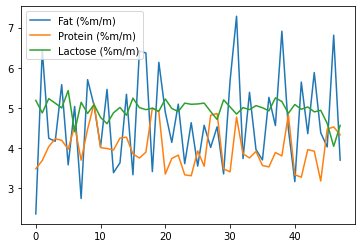

In [165]:
labels = pd.read_excel('Reference values.xlsx')
print(labels.shape)
labels.plot()
labels.head()

### Features

gx-y(3)


397.306909    0.102523
401.164258    1.008154
405.021606    1.008154
408.878955    1.008154
412.736304    0.108095
dtype: float64

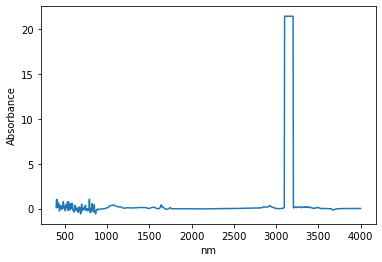

In [166]:
from pyspectra.readers.read_spc import read_spc

spc = read_spc('Spectra\Sample 1.spc')
plt.xlabel("nm")
plt.ylabel("Absorbance")
spc.plot()
spc.head()

Belangrijke gebieden om in de gaten te houden zijn: 
- Fingerprint: 1000 t/m 1585 nm
- C=O - 1700nm
- CH2 (vet) - 2800 t/m 3000 nm

Als we kijken naar deze gebieden krijgen we:
#### Fingerprint

<AxesSubplot:>

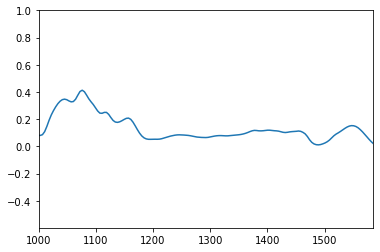

In [167]:
plt.xlim([1000, 1585])
plt.ylim([spc.min(), 1])
spc.plot()

#### C=O

<AxesSubplot:>

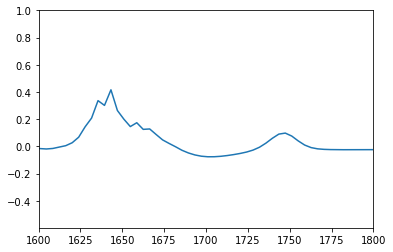

In [168]:
plt.xlim([1600, 1800])
plt.ylim([spc.min(), 1])
spc.plot()

#### CH2 (Vet)

<AxesSubplot:>

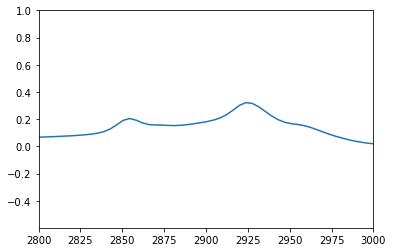

In [169]:
plt.xlim([2800, 3000])
plt.ylim([spc.min(), 1])
spc.plot()

Hieronder vind je dezelfde belangrijke reflectie gebieden, nu alleen vergeleken met alle 48 samples die er zijn.

gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)


,Sample 1.spc,Sample 10.spc,Sample 11.spc,Sample 12.spc,Sample 13.spc,Sample 14.spc,Sample 15.spc,Sample 16.spc,Sample 17.spc,Sample 18.spc,...,Sample 44.spc,Sample 45.spc,Sample 46.spc,Sample 47.spc,Sample 48.spc,Sample 5.spc,Sample 6.spc,Sample 7.spc,Sample 8.spc,Sample 9.spc
397.306909,0.102523,-0.079924,-0.323271,-0.136930,0.125331,0.279098,0.292851,0.691449,0.399158,0.426710,...,-0.152890,0.289391,-0.323950,-0.080623,-0.069079,-0.132207,-0.220950,-0.274788,0.225479,-0.180702
401.164258,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,...,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154
405.021606,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,...,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154
408.878955,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,...,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154
412.736304,0.108095,0.005067,-0.067009,-0.138287,0.475342,0.201846,0.888871,0.168038,0.362750,0.030872,...,-0.032641,0.120329,-0.411707,-0.113812,0.222036,0.531072,0.043406,0.346499,-0.235037,0.069180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984.641138,0.008057,0.016062,0.011350,0.014953,0.006575,0.009834,0.013924,0.015664,0.032445,0.032223,...,0.017721,0.013247,0.009502,0.017391,0.008885,0.011976,0.008789,0.010493,0.007317,0.012368
3988.498486,0.007464,0.015982,0.010947,0.014692,0.006088,0.009457,0.013758,0.015197,0.032323,0.032134,...,0.017608,0.012797,0.009161,0.017366,0.008486,0.011802,0.008386,0.010298,0.006770,0.012298
3992.355835,0.006890,0.015956,0.010624,0.014525,0.005640,0.009150,0.013683,0.014791,0.032285,0.032120,...,0.017565,0.012406,0.008886,0.017393,0.008138,0.011695,0.008029,0.010166,0.006263,0.012278
3996.213184,0.006382,0.016003,0.010413,0.014455,0.005292,0.008939,0.013673,0.014477,0.032303,0.032177,...,0.017603,0.012110,0.008693,0.017478,0.007891,0.011686,0.007779,0.010135,0.005838,0.012330


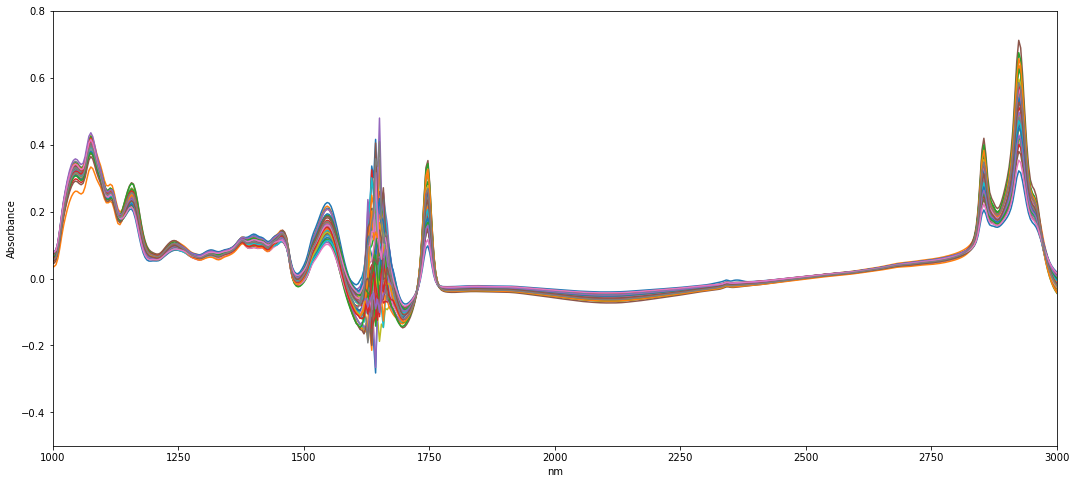

In [170]:
from pyspectra.readers.read_spc import read_spc_dir

df_spc, dict_spc = read_spc_dir('Spectra')
display(df_spc.transpose())
f, ax = plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlabel("nm")
plt.ylabel("Absorbance")
plt.xlim([1000, 3000])
plt.ylim([-0.5, 0.8])
plt.show()

Dit zijn de resultaten van de laatste meting. In totaal zijn er 3 metingen gedaan.

(-0.1, 0.5)

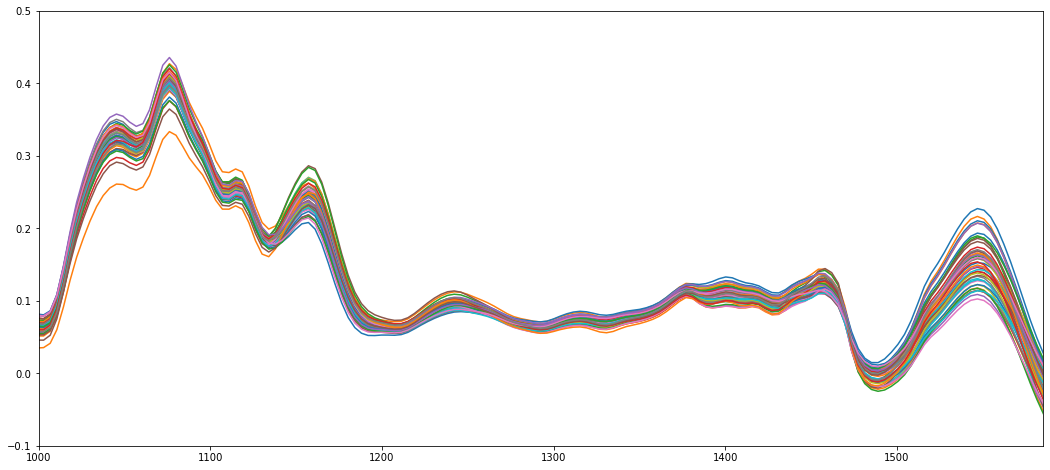

In [171]:
f, ax = plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlim([1000, 1585])
plt.ylim([-0.1, 0.5])

(-0.3, 0.5)

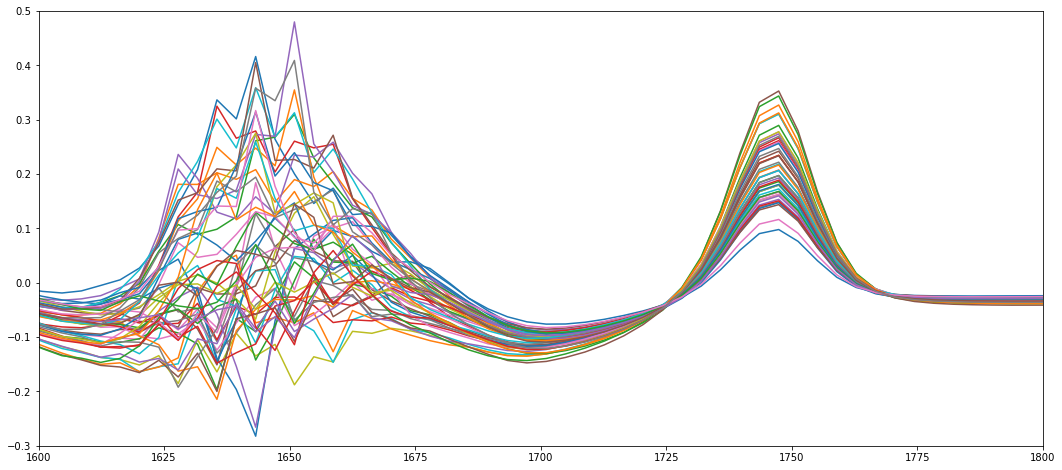

In [172]:
f, ax = plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlim([1600, 1800])
plt.ylim([-0.3, 0.5])

Let op: Het gaat hierbij om het punt 1700!

(-0.1, 0.8)

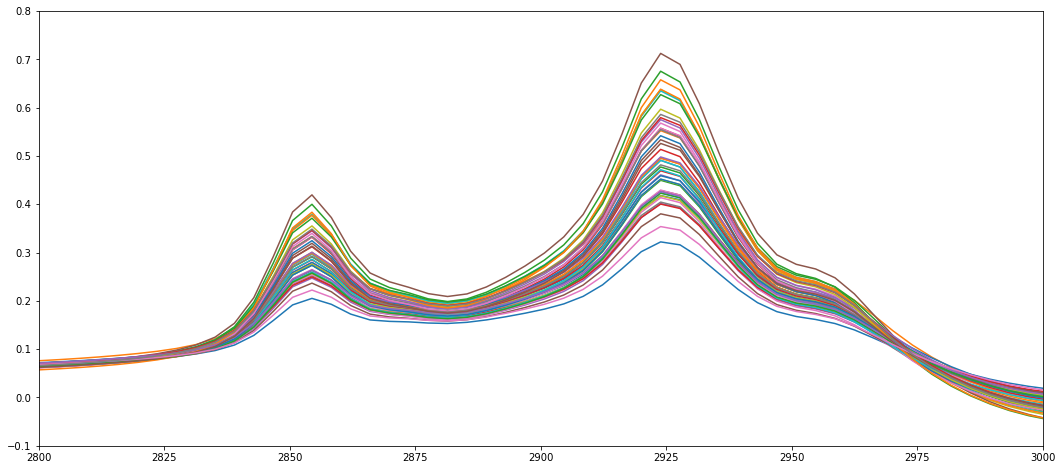

In [173]:
f, ax = plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlim([2800, 3000])
plt.ylim([-0.1, 0.8])

# Data Preperation
Omdat we niet goed onze data kunnen beheren met de pyspectra library, gaan we nu werken met de 'spc' library (https://github.com/rohanisaac/spc). Als eerste moeten we de data van alle samples bij elkaar toevoegen en sorteren, daarna kunnen we verder met de modeling fase.

In [219]:
# Omdat er 3 metingen zijn gedaan, moeten we deze 3 keer met de referentie waarden vergelijken
Sample = pd.read_excel('Reference values.xlsx')
Sample.sort_values('Sample', inplace=True)

Samples = pd.DataFrame()
for meting in range(3):
    Samples = Samples.append(Sample)
    
Samples.drop(columns=['Fat (%m/m)', 'Protein (%m/m)', 'Lactose (%m/m)'], inplace=True)
    
print(Samples.shape)
Samples.head()

(144, 1)


,Sample
0,Sample 1.spc
9,Sample 10.spc
10,Sample 11.spc
11,Sample 12.spc
12,Sample 13.spc


Check of alles goed op alfabetische volgorde staat:

In [175]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(Samples)

           Sample
0    Sample 1.spc
9   Sample 10.spc
10  Sample 11.spc
11  Sample 12.spc
12  Sample 13.spc
13  Sample 14.spc
14  Sample 15.spc
15  Sample 16.spc
16  Sample 17.spc
17  Sample 18.spc
18  Sample 19.spc
1    Sample 2.spc
19  Sample 20.spc
20  Sample 21.spc
21  Sample 22.spc
22  Sample 23.spc
23  Sample 24.spc
24  Sample 25.spc
25  Sample 26.spc
26  Sample 27.spc
27  Sample 28.spc
28  Sample 29.spc
2    Sample 3.spc
29  Sample 30.spc
30  Sample 31.spc
31  Sample 32.spc
32  Sample 33.spc
33  Sample 34.spc
34  Sample 35.spc
35  Sample 36.spc
36  Sample 37.spc
37  Sample 38.spc
38  Sample 39.spc
3    Sample 4.spc
39  Sample 40.spc
40  Sample 41.spc
41  Sample 42.spc
42  Sample 43.spc
43  Sample 44.spc
44  Sample 45.spc
45  Sample 46.spc
46  Sample 47.spc
47  Sample 48.spc
4    Sample 5.spc
5    Sample 6.spc
6    Sample 7.spc
7    Sample 8.spc
8    Sample 9.spc
0    Sample 1.spc
9   Sample 10.spc
10  Sample 11.spc
11  Sample 12.spc
12  Sample 13.spc
13  Sample 14.spc
14  Sample

In [220]:
pd.reset_option('all')
print(Samples)

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

           Sample
0    Sample 1.spc
9   Sample 10.spc
10  Sample 11.spc
11  Sample 12.spc
12  Sample 13.spc
..            ...
4    Sample 5.spc
5    Sample 6.spc
6    Sample 7.spc
7    Sample 8.spc
8    Sample 9.spc

[144 rows x 1 columns]


C:\Users\mailm\anaconda3\lib\site-packages\pandas\_config\config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
C:\Users\mailm\anaconda3\lib\site-packages\pandas\_config\config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


##### Vul een dataframe met alle infrarood metingen:

In [179]:
import spc
import os

X_all = pd.DataFrame()

# Eerst alle resultaten van de éérste meting in de DataFrame, daarna van de tweede meting, enz.
for meting in range(3):
    for file in os.listdir('Spectra'):
        print(file) # Check of volgorde goed is (afspraak: alfabetische volgorde)
        
        f = spc.File('Spectra/' + file)
        X = pd.DataFrame(np.array([f.sub[meting].y]), columns = f.x)
        X_all = X_all.append(X)
        X_all.rename(index={0: file}, inplace=True)

print(X_all.shape)
print(X_all)
X_all.head()

Sample 1.spc
gx-y(3)
Sample 10.spc
gx-y(3)
Sample 11.spc
gx-y(3)
Sample 12.spc
gx-y(3)
Sample 13.spc
gx-y(3)
Sample 14.spc
gx-y(3)
Sample 15.spc
gx-y(3)
Sample 16.spc
gx-y(3)
Sample 17.spc
gx-y(3)
Sample 18.spc
gx-y(3)
Sample 19.spc
gx-y(3)
Sample 2.spc
gx-y(3)
Sample 20.spc
gx-y(3)
Sample 21.spc
gx-y(3)
Sample 22.spc
gx-y(3)
Sample 23.spc
gx-y(3)
Sample 24.spc
gx-y(3)
Sample 25.spc
gx-y(3)
Sample 26.spc
gx-y(3)
Sample 27.spc
gx-y(3)
Sample 28.spc
gx-y(3)
Sample 29.spc
gx-y(3)
Sample 3.spc
gx-y(3)
Sample 30.spc
gx-y(3)
Sample 31.spc
gx-y(3)
Sample 32.spc
gx-y(3)
Sample 33.spc
gx-y(3)
Sample 34.spc
gx-y(3)
Sample 35.spc
gx-y(3)
Sample 36.spc
gx-y(3)
Sample 37.spc
gx-y(3)
Sample 38.spc
gx-y(3)
Sample 39.spc
gx-y(3)
Sample 4.spc
gx-y(3)
Sample 40.spc
gx-y(3)
Sample 41.spc
gx-y(3)
Sample 42.spc
gx-y(3)
Sample 43.spc
gx-y(3)
Sample 44.spc
gx-y(3)
Sample 45.spc
gx-y(3)
Sample 46.spc
gx-y(3)
Sample 47.spc
gx-y(3)
Sample 48.spc
gx-y(3)
Sample 5.spc
gx-y(3)
Sample 6.spc
gx-y(3)
Sample 7.spc
gx-

,397.306909,401.164258,405.021606,408.878955,412.736304,416.593652,420.451001,424.308350,428.165698,432.023047,...,3965.354395,3969.211743,3973.069092,3976.926440,3980.783789,3984.641138,3988.498486,3992.355835,3996.213184,4000.070532
Sample 1.spc,0.469832,1.008154,1.008154,1.008154,0.052305,0.115211,0.258473,-0.136622,-0.067475,0.161927,...,0.008624,0.008933,0.008978,0.008795,0.008411,0.007903,0.007321,0.006737,0.006204,0.005813
Sample 10.spc,-0.355521,1.008154,1.008154,1.008154,-0.322469,-0.030074,0.006049,0.194777,-0.155512,-0.097691,...,0.014614,0.014709,0.014709,0.014640,0.014527,0.014412,0.014326,0.014299,0.014337,0.014481
Sample 11.spc,-0.038006,1.008154,1.008154,1.008154,-0.312722,-0.007545,-0.093968,0.225209,0.709258,0.290771,...,0.011609,0.011696,0.011594,0.011346,0.010990,0.010583,0.010176,0.009836,0.009602,0.009513
Sample 12.spc,0.273505,1.008154,1.008154,1.008154,0.107145,0.221148,-0.033111,-0.094327,0.071331,0.389894,...,0.016182,0.016219,0.016128,0.015935,0.015671,0.015390,0.015142,0.014968,0.014893,0.014935
Sample 13.spc,0.029236,1.008154,1.008154,1.008154,-0.269624,-0.190024,-0.370867,-0.089954,0.328151,-0.304767,...,0.008668,0.008812,0.008736,0.008480,0.008087,0.007626,0.007159,0.006745,0.006405,0.006222


##### Vul een dataframe met alle referentie waarden 3 keer onder elkaar:

In [217]:
# Omdat er 3 metingen zijn gedaan, moeten we deze 3 keer met de referentie waarden vergelijken
Y = pd.read_excel('Reference values.xlsx')
Y.sort_values('Sample', inplace=True)
print(Y.head()) # Check op alfabetische volgorde

Y_all = pd.DataFrame()
for meting in range(3):
    Y_all = Y_all.append(Y, ignore_index=True)
    
Y_all.drop(columns=['Sample'], inplace=True)

print(Y_all.shape)
Y_all.head()

           Sample  Fat (%m/m)  Protein (%m/m)  Lactose (%m/m)
0    Sample 1.spc       2.362           3.486           5.189
9   Sample 10.spc       5.059           5.115           5.085
10  Sample 11.spc       4.035           4.012           4.764
11  Sample 12.spc       5.463           3.991           4.607
12  Sample 13.spc       3.389           3.953           4.880
(144, 3)


,Fat (%m/m),Protein (%m/m),Lactose (%m/m)
0,2.362,3.486,5.189
1,5.059,5.115,5.085
2,4.035,4.012,4.764
3,5.463,3.991,4.607
4,3.389,3.953,4.880


##### Vul een dataframe met de vet referentie waarden 3 keer onder elkaar:

In [211]:
# Omdat er 3 metingen zijn gedaan, moeten we deze 3 keer met de referentie waarden vergelijken
Y = pd.read_excel('Reference values.xlsx')
Y.sort_values('Sample', inplace=True)

Y_Fat = pd.DataFrame()
for meting in range(3):
    Y_Fat = Y_Fat.append(Y, ignore_index=True)
    
Y_Fat.drop(columns=['Sample', 'Protein (%m/m)', 'Lactose (%m/m)'], inplace=True)

print(Y_Fat.shape)
Y_Fat.head()

(144, 1)


,Fat (%m/m)
0,2.362
1,5.059
2,4.035
3,5.463
4,3.389


##### Vul een dataframe met de proteïne referentie waarden 3 keer onder elkaar:

In [213]:
# Omdat er 3 metingen zijn gedaan, moeten we deze 3 keer met de referentie waarden vergelijken
Y = pd.read_excel('Reference values.xlsx')
Y.sort_values('Sample', inplace=True)

Y_Protein = pd.DataFrame()
for meting in range(3):
    Y_Protein = Y_Protein.append(Y, ignore_index=True)
    
Y_Protein.drop(columns=['Sample', 'Fat (%m/m)', 'Lactose (%m/m)'], inplace=True)
    
print(Y_Protein.shape)
Y_Protein.head()

(144, 1)


,Protein (%m/m)
0,3.486
1,5.115
2,4.012
3,3.991
4,3.953


##### Vul een dataframe met de lactose referentie waarden 3 keer onder elkaar:

In [251]:
# Omdat er 3 metingen zijn gedaan, moeten we deze 3 keer met de referentie waarden vergelijken
Y = pd.read_excel('Reference values.xlsx')
Y.sort_values('Sample', inplace=True)

Y_Lactose = pd.DataFrame()
for meting in range(3):
    Y_Lactose = Y_Lactose.append(Y, ignore_index=True)
    
Y_Lactose.drop(columns=['Sample', 'Fat (%m/m)', 'Protein (%m/m)'], inplace=True)
    
print(Y_Lactose.shape)
Y_Lactose.head()

(144, 1)


,Lactose (%m/m)
0,5.189
1,5.085
2,4.764
3,4.607
4,4.880


# Modeling
Bij het modellen gebruiken we eerst de train_test_split voor lasso. Daarna zullen we dit zonder enige train_test_split doen, zo kunnen we uiteindlijk de resultaten vergelijken.

### Models met train_test_split

##### MultiTaskLassoCV voor alle referentie waarden tegelijk:

In [221]:
from sklearn.model_selection import train_test_split

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, Y_all, test_size=0.2, random_state=11)
print(X_train_all.shape, X_test_all.shape, y_train_all.shape, y_test_all.shape)

(115, 935) (29, 935) (115, 3) (29, 3)


In [222]:
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.metrics import r2_score

reg_all = MultiTaskLassoCV(cv=5, random_state=11).fit(X_train_all, y_train_all)
r2_score(y_test_all, reg_all.predict(X_test_all))

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1950: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.044675056415745845, tolerance: 0.018630587260869535
  cd_fast.enet_coordinate_descent_multi_task(


0.894965840528689

Note: R2 score geeft de hoeveelheid variatie in de data die wordt verklaard door het model aan.

In [223]:
reg_all.alpha_

0.0004889605949720059

##### LassoCV voor vet (met train_test_split):

In [224]:
from sklearn.model_selection import train_test_split

X_train_Fat, X_test_Fat, y_train_Fat, y_test_Fat = train_test_split(X_all, Y_Fat, test_size=0.2, random_state=11)
print(X_train_Fat.shape, X_test_Fat.shape, y_train_Fat.shape, y_test_Fat.shape)

(115, 935) (29, 935) (115, 1) (29, 1)


In [225]:
from sklearn.linear_model import LassoCV

reg_Fat = LassoCV(cv=5, random_state=11).fit(X_train_Fat, y_train_Fat)
reg_Fat.score(X_test_Fat, y_test_Fat)

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mailm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.037769382668926016, tolerance: 0.015026540944347824
  model = cd_fast.enet_coordinate_descent(


0.9982555656832066

In [226]:
reg_Fat.alpha_

0.00041097852282130876

<AxesSubplot:>

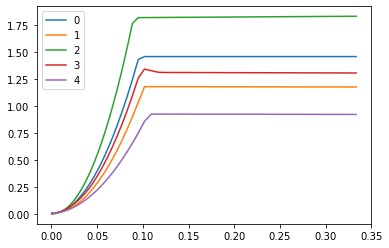

In [227]:
df_Fat = pd.DataFrame(reg_Fat.mse_path_).T
df_Fat.columns = reg_Fat.alphas_
df_Fat.T.plot()

##### LassoCV voor proteïne (met train_test_split):

In [254]:
from sklearn.model_selection import train_test_split

X_train_Protein, X_test_Protein, y_train_Protein, y_test_Protein = train_test_split(X_all, Y_Protein, test_size=0.2, random_state=11)
print(X_train_Protein.shape, X_test_Protein.shape, y_train_Protein.shape, y_test_Protein.shape)

(115, 935) (29, 935) (115, 1) (29, 1)


In [255]:
from sklearn.linear_model import LassoCV

reg_Protein = LassoCV(cv=5, random_state=11).fit(X_train_Protein, y_train_Protein)
reg_Protein.score(X_test_Protein, y_test_Protein)

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mailm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005851137581232235, tolerance: 0.002917365777391305
  model = cd_fast.enet_coordinate_descent(


0.9979598878608619

In [256]:
reg_Protein.alpha_

0.0002640579612315904

<AxesSubplot:>

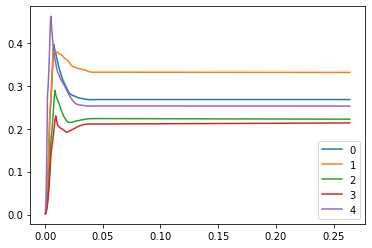

In [257]:
df_Protein = pd.DataFrame(reg_Protein.mse_path_).T
df_Protein.columns = reg_Protein.alphas_
df_Protein.T.plot()

##### LassoCV voor lactose (met train_test_split):

In [235]:
from sklearn.model_selection import train_test_split

X_train_Lactose, X_test_Lactose, y_train_Lactose, y_test_Lactose = train_test_split(X_all, Y_Lactose, test_size=0.2, random_state=11)
print(X_train_Lactose.shape, X_test_Lactose.shape, y_train_Lactose.shape, y_test_Lactose.shape)

(115, 935) (29, 935) (115, 1) (29, 1)


In [236]:
from sklearn.linear_model import LassoCV

reg_Lactose = LassoCV(cv=5, random_state=11).fit(X_train_Lactose, y_train_Lactose)
reg_Lactose.score(X_test_Lactose, y_test_Lactose)

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.4686916650278016

In [237]:
reg_Lactose.alpha_

0.0034131210185592863

<AxesSubplot:>

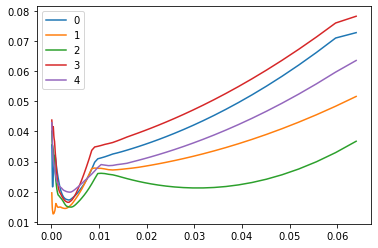

In [238]:
df_Lactose = pd.DataFrame(reg_Lactose.mse_path_).T
df_Lactose.columns = reg_Lactose.alphas_
df_Lactose.T.plot()

### Models zonder train_test_split

##### MultiTaskLassoCV voor alle referentie waarden tegelijk:

In [239]:
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.metrics import r2_score

reg_all_2 = MultiTaskLassoCV(cv=5, random_state=11).fit(X_all, Y_all)
r2_score(Y_all, reg_all_2.predict(X_all))

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1950: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05754288831330234, tolerance: 0.023478008181250027
  cd_fast.enet_coordinate_descent_multi_task(


0.9887880041766793

Note: R2 score geeft de hoeveelheid variatie in de data die wordt verklaard door het model aan.

In [240]:
reg_all_2.alpha_

0.0004680129248275441

##### LassoCV voor vet (zonder train_test_split):

In [241]:
from sklearn.linear_model import LassoCV

reg_Fat_2 = LassoCV(cv=5, random_state=11).fit(X_all, Y_Fat)
reg_Fat_2.score(X_all, Y_Fat)

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mailm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04809963572725281, tolerance: 0.019061138993749997
  model = cd_fast.enet_coordinate_descent(


0.9997183317520569

In [242]:
reg_Fat_2.alpha_

0.0002457625755031348

<AxesSubplot:>

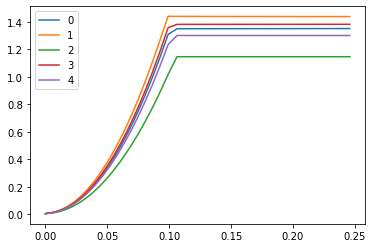

In [243]:
df_Fat_2 = pd.DataFrame(reg_Fat_2.mse_path_).T
df_Fat_2.columns = reg_Fat_2.alphas_
df_Fat_2.T.plot()

##### LassoCV voor proteïne (zonder train_test_split):

In [244]:
from sklearn.linear_model import LassoCV

reg_Protein_2 = LassoCV(cv=5, random_state=11).fit(X_all, Y_Protein)
reg_Protein_2.score(X_all, Y_Protein)

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mailm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010080096264809817, tolerance: 0.00363462884375
  model = cd_fast.enet_coordinate_descent(


0.9992817444994287

In [245]:
reg_Protein_2.alpha_

0.00022045279197308823

<AxesSubplot:>

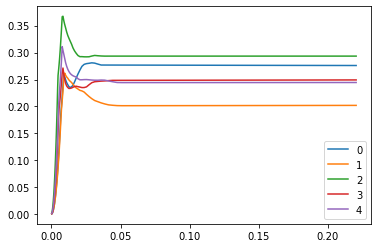

In [246]:
df_Protein_2 = pd.DataFrame(reg_Protein_2.mse_path_).T
df_Protein_2.columns = reg_Protein_2.alphas_
df_Protein_2.T.plot()

##### LassoCV voor lactose (zonder train_test_split):

In [247]:
from sklearn.linear_model import LassoCV

reg_Lactose_2 = LassoCV(cv=5, random_state=11).fit(X_all, Y_Lactose)
reg_Lactose.score(X_all, Y_Lactose)

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7917625875075595

In [248]:
reg_Lactose_2.alpha_

0.0027136945113102715

<AxesSubplot:>

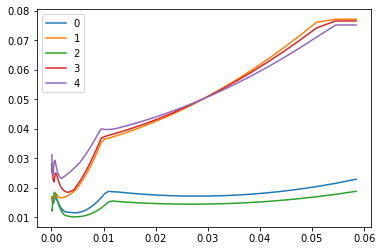

In [249]:
df_Lactose_2 = pd.DataFrame(reg_Lactose_2.mse_path_).T
df_Lactose_2.columns = reg_Lactose_2.alphas_
df_Lactose_2.T.plot()